In [1]:
# Load libraries
from pandas import read_csv
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [2]:
#load data
data=pd.read_csv(r"C:\Users\dell 7480\Desktop\Data processing\projet\OnlineNewsPopularity.csv")
print(data.shape)

(5102, 60)


In [3]:
df = pd.DataFrame (data)
df.head()

timedelta   ntokenstitle   ntokenscontent   nuniquetokens   nnonstopwords  \
0         731             12              219        0.663594             1.0   
1         731              9              255        0.604743             1.0   
2         731              9              211        0.575130             1.0   
3         731              9              531        0.503788             1.0   
4         731             13             1072        0.415646             1.0   

    nnonstopuniquetokens   numhrefs   numselfhrefs   numimgs   numvideos  ...  \
0               0.815385          4              2         1           0  ...   
1               0.791946          3              1         1           0  ...   
2               0.663866          3              1         1           0  ...   
3               0.665635          9              0         1           0  ...   
4               0.540890         19             19        20           0  ...   

    minpositivepolarity   maxpositivepolarity   avgnegativepolarity  \
0              0.100000                   0.7             -0.350000   
1              0.033333                   0.7             -0.118750   
2              0.100000                   1.0             -0.466667   
3              0.136364                   0.8             -0.369697   
4              0.033333                   1.0             -0.220192   

    minnegativepolarity   maxnegativepolarity   titlesubjectivity  \
0                -0.600             -0.200000            0.500000   
1                -0.125             -0.100000            0.000000   
2                -0.800             -0.133333            0.000000   
3                -0.600             -0.166667            0.000000   
4                -0.500             -0.050000            0.454545   

    titlesentimentpolarity   abstitlesubjectivity   abstitlesentimentpolarity  \
0                -0.187500               0.000000                    0.187500   
1                 0.000000               0.500000                    0.000000   
2                 0.000000               0.500000                    0.000000   
3                 0.000000               0.500000                    0.000000   
4                 0.136364               0.045455                    0.136364   

    shares  
0      593  
1      711  
2     1500  
3     1200  
4      505  

[5 rows x 60 columns]

In [4]:
df.describe()

timedelta   ntokenstitle   ntokenscontent   nuniquetokens  \
count  5102.000000    5102.000000      5102.000000     5102.000000   
mean    686.660721       9.796746       477.935515        0.562851   
std      26.373851       1.958410       396.811734        0.119439   
min     639.000000       4.000000         0.000000        0.000000   
25%     665.000000       8.000000       221.000000        0.488227   
50%     687.000000      10.000000       349.000000        0.562893   
75%     709.000000      11.000000       614.750000        0.635354   
max     731.000000      18.000000      4125.000000        1.000000   

        nnonstopwords   nnonstopuniquetokens     numhrefs   numselfhrefs  \
count     5102.000000            5102.000000  5102.000000    5102.000000   
mean         0.991964               0.705653     9.497060       3.210506   
std          0.089292               0.122586     9.681008       4.701143   
min          0.000000               0.000000     0.000000       0.000000   
25%          1.000000               0.643345     4.000000       1.000000   
50%          1.000000               0.711500     6.000000       2.000000   
75%          1.000000               0.779661    11.000000       4.000000   
max          1.000000               1.000000   171.000000      74.000000   

           numimgs    numvideos  ...   minpositivepolarity  \
count  5102.000000  5102.000000  ...           5102.000000   
mean      3.685809     1.377695  ...              0.099200   
std       7.043057     5.173583  ...              0.072581   
min       0.000000     0.000000  ...              0.000000   
25%       0.000000     0.000000  ...              0.050000   
50%       1.000000     0.000000  ...              0.100000   
75%       1.000000     1.000000  ...              0.100000   
max      99.000000    75.000000  ...              1.000000   

        maxpositivepolarity   avgnegativepolarity   minnegativepolarity  \
count           5102.000000           5102.000000           5102.000000   
mean               0.766474             -0.255052             -0.484136   
std                0.227126              0.127269              0.274022   
min                0.000000             -1.000000             -1.000000   
25%                0.600000             -0.322917             -0.666667   
50%                0.800000             -0.247619             -0.500000   
75%                1.000000             -0.178895             -0.291667   
max                1.000000              0.000000              0.000000   

        maxnegativepolarity   titlesubjectivity   titlesentimentpolarity  \
count           5102.000000         5102.000000              5102.000000   
mean              -0.115149            0.280593                 0.088948   
std                0.102313            0.327057                 0.269367   
min               -1.000000            0.000000                -1.000000   
25%               -0.125000            0.000000                 0.000000   
50%               -0.100000            0.100000                 0.000000   
75%               -0.050000            0.500000                 0.193182   
max                0.000000            1.000000                 1.000000   

        abstitlesubjectivity   abstitlesentimentpolarity         shares  
count            5102.000000                 5102.000000    5102.000000  
mean                0.346681                    0.160273    3316.516464  
std                 0.186826                    0.234050   11506.802788  
min                 0.000000                    0.000000       4.000000  
25%                 0.166667                    0.000000    1100.000000  
50%                 0.500000                    0.000000    1600.000000  
75%                 0.500000                    0.250000    2900.000000  
max                 0.500000                    1.000000  617900.000000  

[8 rows x 60 columns]

In [5]:
print('Répartition des classes')
print(data.groupby(' shares').size())

Répartition des classes
 shares
4         1
217       1
294       1
300       1
302       1
         ..
80400     1
144400    1
227300    1
306100    1
617900    1
Length: 775, dtype: int64


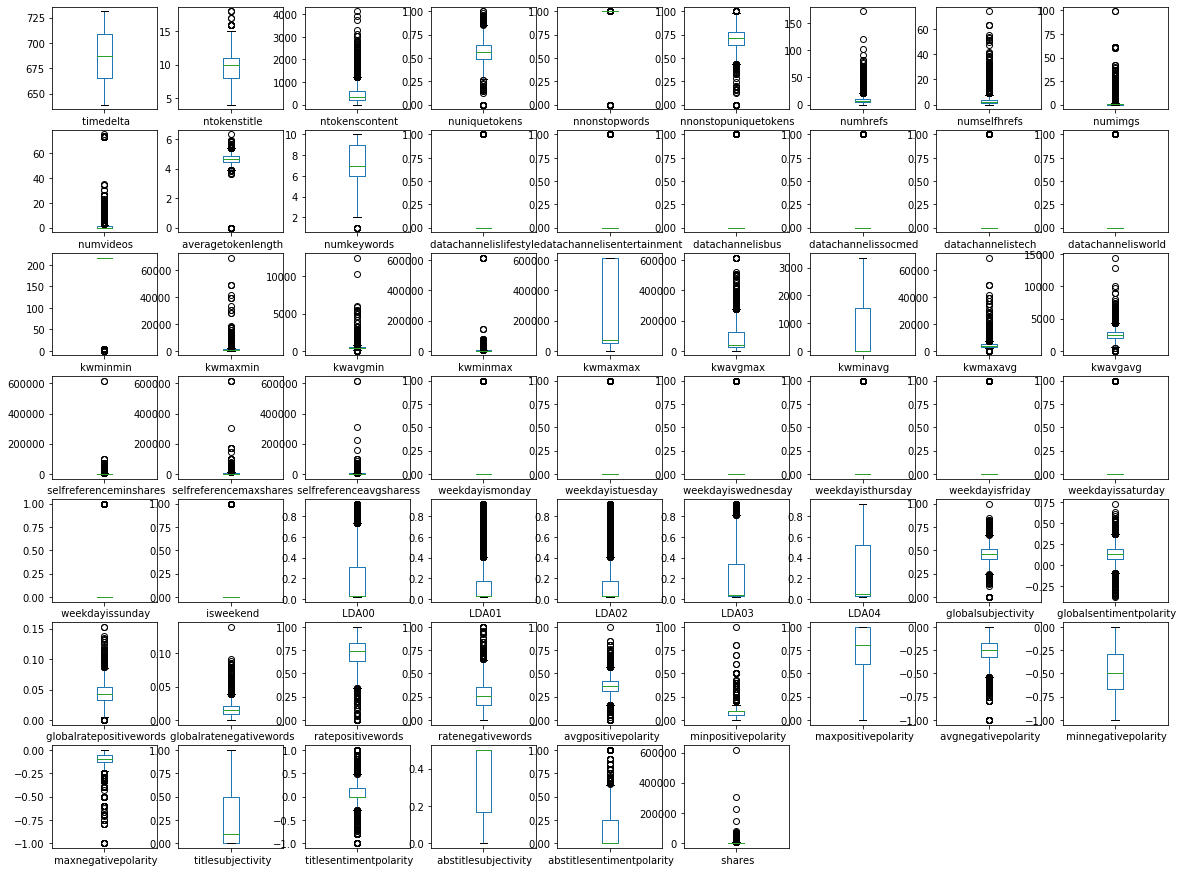

In [6]:
#box
df.plot(kind='box',subplots= True , layout = (9,9),sharex = False,sharey = False,figsize =(20,20))
plt.show()

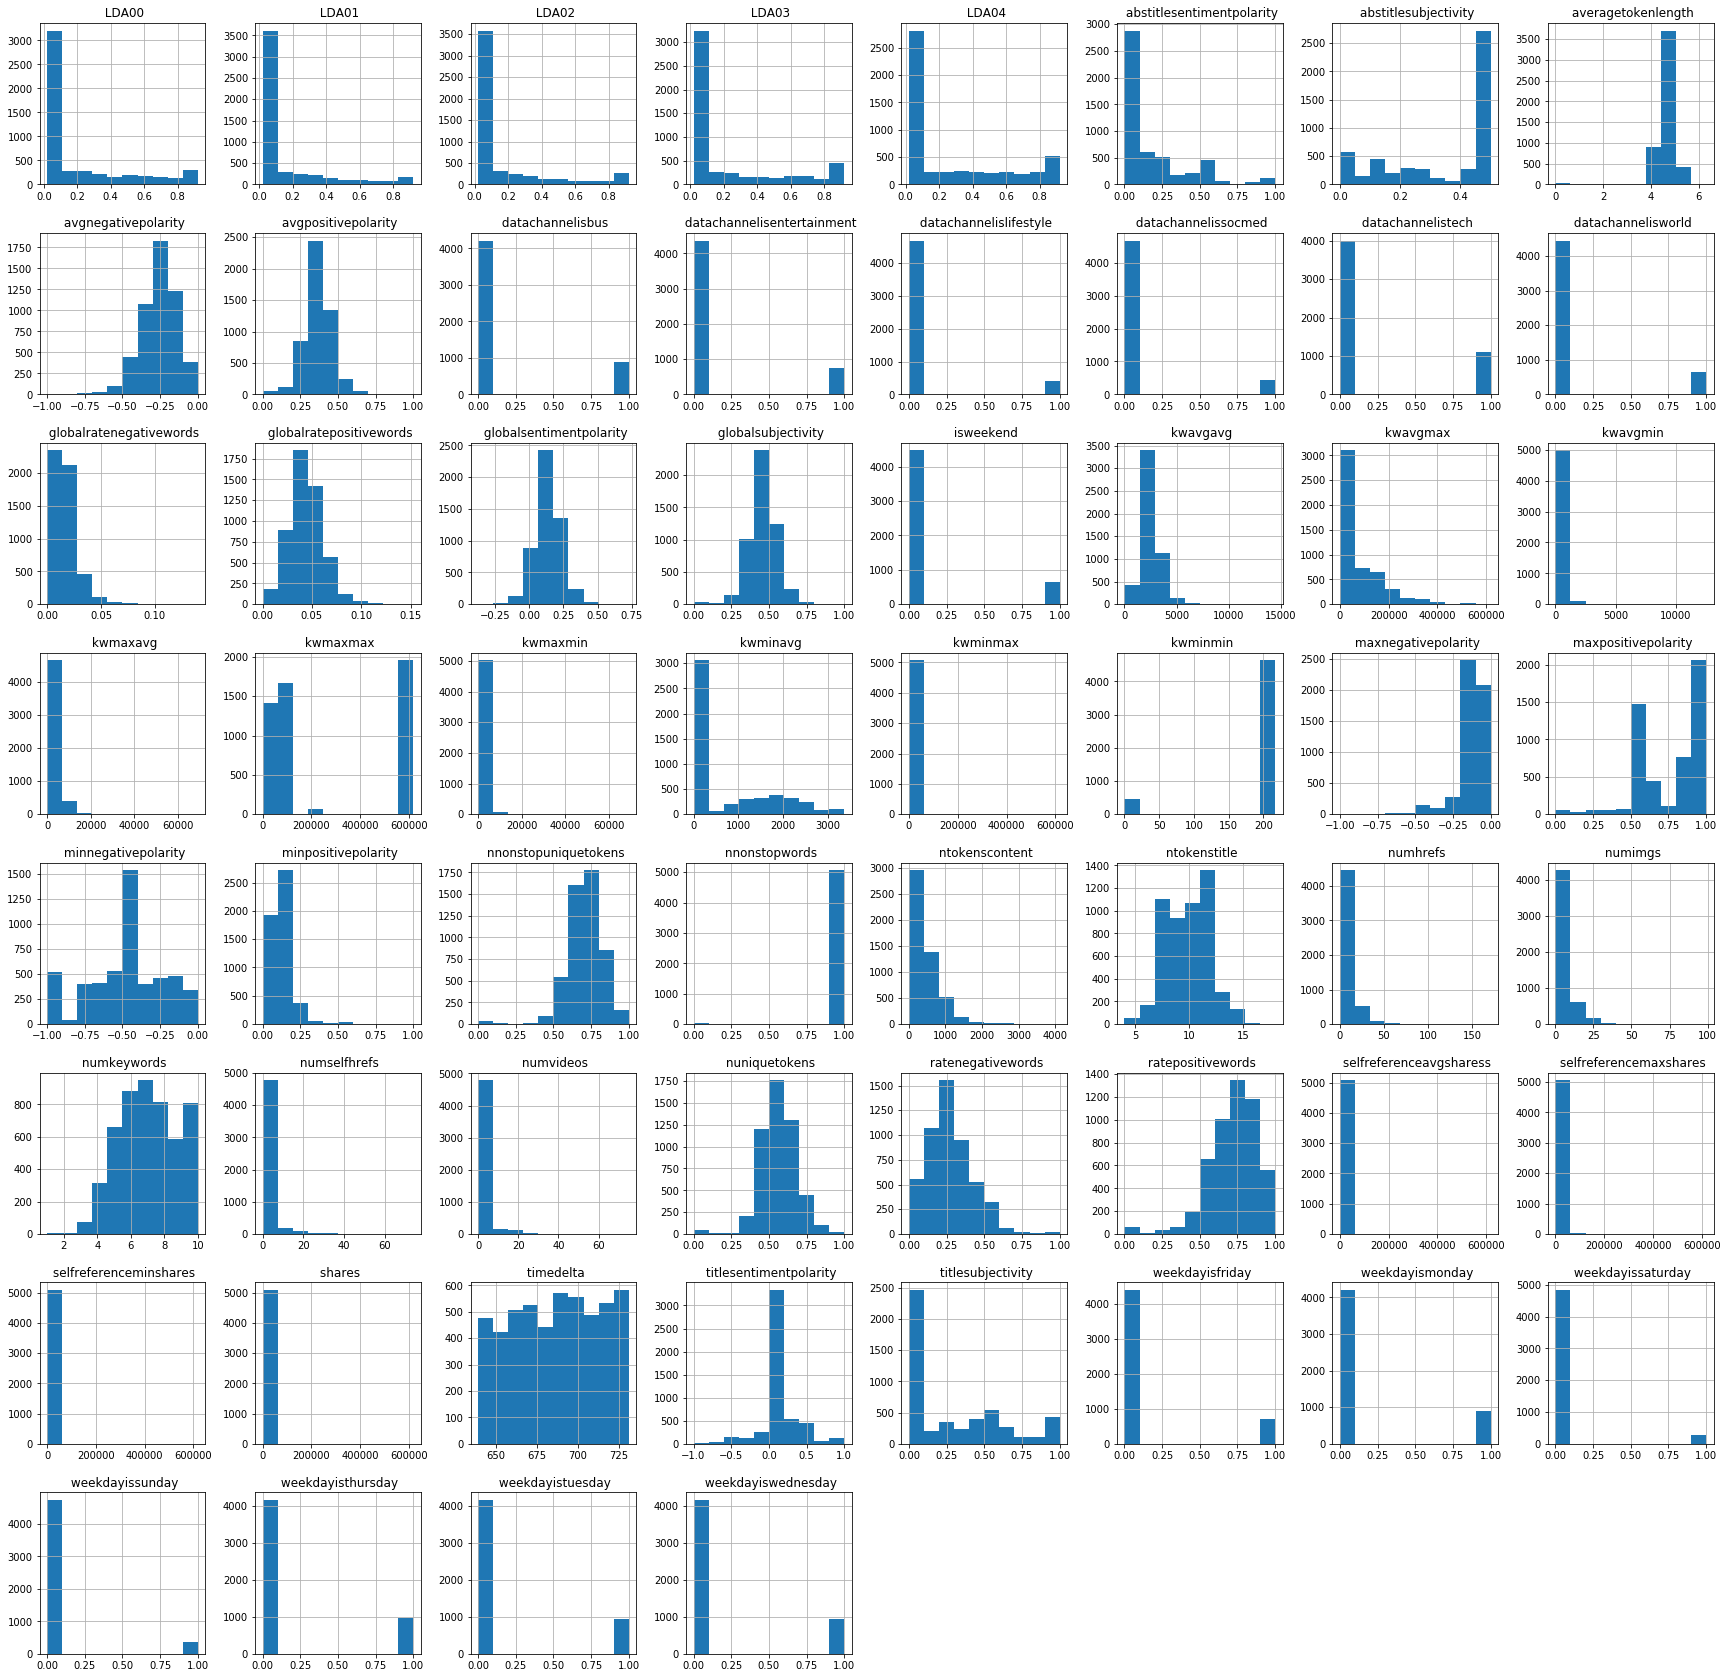

In [7]:
#histograms
data.hist(figsize=(30,30))
plt.show()

In [8]:
df.head()

timedelta   ntokenstitle   ntokenscontent   nuniquetokens   nnonstopwords  \
0         731             12              219        0.663594             1.0   
1         731              9              255        0.604743             1.0   
2         731              9              211        0.575130             1.0   
3         731              9              531        0.503788             1.0   
4         731             13             1072        0.415646             1.0   

    nnonstopuniquetokens   numhrefs   numselfhrefs   numimgs   numvideos  ...  \
0               0.815385          4              2         1           0  ...   
1               0.791946          3              1         1           0  ...   
2               0.663866          3              1         1           0  ...   
3               0.665635          9              0         1           0  ...   
4               0.540890         19             19        20           0  ...   

    minpositivepolarity   maxpositivepolarity   avgnegativepolarity  \
0              0.100000                   0.7             -0.350000   
1              0.033333                   0.7             -0.118750   
2              0.100000                   1.0             -0.466667   
3              0.136364                   0.8             -0.369697   
4              0.033333                   1.0             -0.220192   

    minnegativepolarity   maxnegativepolarity   titlesubjectivity  \
0                -0.600             -0.200000            0.500000   
1                -0.125             -0.100000            0.000000   
2                -0.800             -0.133333            0.000000   
3                -0.600             -0.166667            0.000000   
4                -0.500             -0.050000            0.454545   

    titlesentimentpolarity   abstitlesubjectivity   abstitlesentimentpolarity  \
0                -0.187500               0.000000                    0.187500   
1                 0.000000               0.500000                    0.000000   
2                 0.000000               0.500000                    0.000000   
3                 0.000000               0.500000                    0.000000   
4                 0.136364               0.045455                    0.136364   

    shares  
0      593  
1      711  
2     1500  
3     1200  
4      505  

[5 rows x 60 columns]

In [9]:
df.describe().transpose()

count           mean            std        min  \
 timedelta                   5102.0     686.660721      26.373851  639.00000   
 ntokenstitle                5102.0       9.796746       1.958410    4.00000   
 ntokenscontent              5102.0     477.935515     396.811734    0.00000   
 nuniquetokens               5102.0       0.562851       0.119439    0.00000   
 nnonstopwords               5102.0       0.991964       0.089292    0.00000   
 nnonstopuniquetokens        5102.0       0.705653       0.122586    0.00000   
 numhrefs                    5102.0       9.497060       9.681008    0.00000   
 numselfhrefs                5102.0       3.210506       4.701143    0.00000   
 numimgs                     5102.0       3.685809       7.043057    0.00000   
 numvideos                   5102.0       1.377695       5.173583    0.00000   
 averagetokenlength          5102.0       4.621892       0.500814    0.00000   
 numkeywords                 5102.0       7.177969       1.890577    1.00000   
 datachannelislifestyle      5102.0       0.082321       0.274880    0.00000   
 datachannelisentertainment  5102.0       0.144453       0.351583    0.00000   
 datachannelisbus            5102.0       0.174245       0.379358    0.00000   
 datachannelissocmed         5102.0       0.083693       0.276953    0.00000   
 datachannelistech           5102.0       0.215406       0.411144    0.00000   
 datachannelisworld          5102.0       0.128381       0.334546    0.00000   
 kwminmin                    5102.0     197.441592      61.624623    0.00000   
 kwmaxmin                    5102.0    1245.590945    2567.751416    0.00000   
 kwavgmin                    5102.0     488.507412     426.079544    0.00000   
 kwminmax                    5102.0    4542.984320   25987.587315    0.00000   
 kwmaxmax                    5102.0  274936.769894  271450.201431    0.00000   
 kwavgmax                    5102.0   83147.915999   91248.849508    0.00000   
 kwminavg                    5102.0     721.310447     978.305372    0.00000   
 kwmaxavg                    5102.0    4409.841986    3078.215947    0.00000   
 kwavgavg                    5102.0    2482.241912     940.267525    0.00000   
 selfreferenceminshares      5102.0    2590.450412   13609.124017    0.00000   
 selfreferencemaxshares      5102.0    5663.608977   20791.925681    0.00000   
 selfreferenceavgsharess     5102.0    3754.154932   15101.513052    0.00000   
 weekdayismonday             5102.0       0.177577       0.382194    0.00000   
 weekdayistuesday            5102.0       0.183653       0.387239    0.00000   
 weekdayiswednesday          5102.0       0.186397       0.389465    0.00000   
 weekdayisthursday           5102.0       0.186789       0.389781    0.00000   
 weekdayisfriday             5102.0       0.140729       0.347776    0.00000   
 weekdayissaturday           5102.0       0.052528       0.223112    0.00000   
 weekdayissunday             5102.0       0.072325       0.259050    0.00000   
 isweekend                   5102.0       0.124853       0.330585    0.00000   
 LDA00                       5102.0       0.203467       0.273712    0.02000   
 LDA01                       5102.0       0.148967       0.225753    0.02000   
 LDA02                       5102.0       0.160169       0.246013    0.02000   
 LDA03                       5102.0       0.216658       0.292518    0.02000   
 LDA04                       5102.0       0.270739       0.314084    0.02000   
 globalsubjectivity          5102.0       0.455353       0.095949    0.00000   
 globalsentimentpolarity     5102.0       0.137372       0.099197   -0.37393   
 globalratepositivewords     5102.0       0.044017       0.017508    0.00000   
 globalratenegativewords     5102.0       0.016594       0.011463    0.00000   
 ratepositivewords           5102.0       0.721742       0.164522    0.00000   
 ratenegativewords           5102.0       0.270222       0.153096    0.00000   
 avgpositivepolarity         5

In [18]:
df.shape

(5102, 60)

In [19]:
df.dropna(inplace=True)
X = df.drop(' shares',axis=1)
X = X.drop(' timedelta',axis=1)
y = df[' shares']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
mlp = MLPClassifier(hidden_layer_sizes=(40,40,40),max_iter=700)

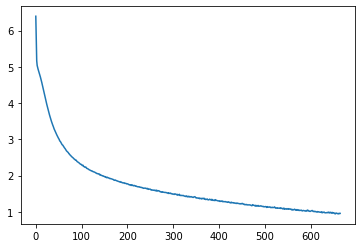

In [29]:
mlp.fit(X_train,y_train)
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.show()

In [21]:
y_pred = mlp.predict(X_test)
print("Predicted labels : \n{}".format(y_pred))
# Calculate the accuracy
print(accuracy_score(y_test, y_pred))

Predicted labels : 
[5500 2100 1000 ...  934  599 3600]
0.014890282131661442


Predicted labels : 
[3300 1300 3100 ...  645  870 1800]
0.01567398119122257


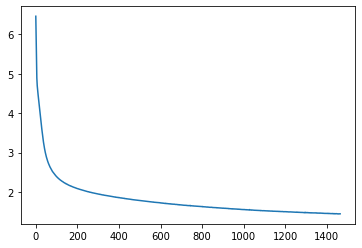

In [30]:
mlp = MLPClassifier(hidden_layer_sizes=(40),max_iter=1500)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Predicted labels : \n{}".format(y_pred))
print(accuracy_score(y_test, y_pred))
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.show()

Predicted labels : 
[1400 1500 1300 ... 2500 3400 4600]
0.018025078369905956


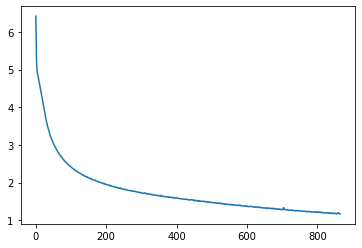

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(40,40),max_iter=1000)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print("Predicted labels : \n{}".format(y_pred))
print(accuracy_score(y_test, y_pred))
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.show()


In [ ]:
# Fisher Dimensionality Reduction
X_f = SelectKBest(f_classif, k=40)
X_f = X_f.fit_transform(X, y)
# Mutual Dimensionality Reduction
X_mi = SelectKBest(mutual_info_classif, k=40)
X_mi = X_mi.fit_transform(X, y)

In [ ]:
print(X_f )

In [ ]:
print(X_mi)

In [ ]:
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y, test_size= 0.2, random_state=60)
# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes = (40),solver='adam',learning_rate_init= 0.01, max_iter=1000)
# Train the model
mlp.fit(X_f_train, y_f_train)
# Make the prediction
y_pred = mlp.predict(X_f_test)
print("Predicted labels : \n{}".format(y_pred))

In [ ]:
  print(accuracy_score(y_f_test, y_pred))
    


In [ ]:
from sklearn.decomposition import PCA
# Définition de l'hyperparamètre du nombre de composantes voulues
model = PCA(n_components=10)
# Alimentation du modèle
model.fit(df)
# Transformation avec ses propres données
reduc = model.transform(df )

In [ ]:
print(reduc)

In [ ]:
print(reduc.shape)

In [ ]:
df = pd.DataFrame (reduc)
df.head()

In [ ]:
df.describe()

In [ ]:
df.describe().transpose()
df.shape

In [ ]:
df.describe().transpose()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#multilayer perceptron with 1 hidden_layer
mlp = MLPClassifier(hidden_layer_sizes=(40),solver='adam',learning_rate_init= 0.01, max_iter=1000)
# Train the model
mlp.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = mlp.predict(X_test)

In [112]:
print(accuracy_score(y_test, y_pred))

0.219435736677116


In [32]:
from sklearn.neural_network import MLPClassifier
#multilayer perceptron with 2 hidden_layer
mlp = MLPClassifier(hidden_layer_sizes=(40,40),solver='adam',learning_rate_init= 0.01, max_iter=1000)
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 40), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [33]:
y_pred = mlp.predict(X_test)
print(0.3500837523)

0.3500837523


In [34]:
from sklearn.neural_network import MLPClassifier
#multilayer perceptron with 1 hidden_layer
mlp = MLPClassifier(hidden_layer_sizes=(40,40,40),solver='adam',learning_rate_init= 0.1, max_iter=1000)
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 40, 40), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [116]:
y_pred = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.293730407523511


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)



In [26]:
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

0.347897380727985
